# Importing Libraries


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install plotly_express

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly_express as px
import itertools
%matplotlib inline

# setting up plot style
style.use('seaborn-poster')
style.use('fivethirtyeight')

<ipython-input-52-cf5d85f22779>:11: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [ ]:
df = pd.read_csv(r'/content/gdrive/MyDrive/Multivariate Analysis /Loan payments data.csv')

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [ ]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


# Univariate Analysis


## Loan Status

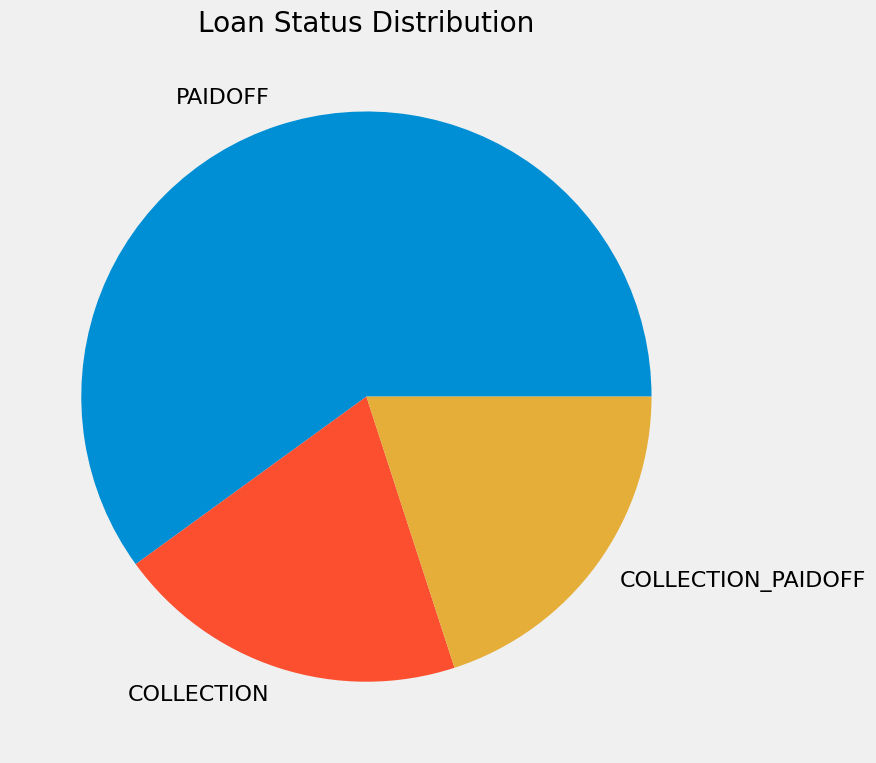

In [ ]:
plt.pie(df['loan_status'].value_counts(),labels=df['loan_status'].unique())
plt.title('Loan Status Distribution')
plt.show()

## Inference

---
Out of 500 people

300 repaid on time

100 did not repaid the loan

100 repaid but lately after due date



## Gender Distribution

In [ ]:
b= df['Gender'].value_counts()
pd.DataFrame(b)

,Gender
male,423
female,77


Text(0.5, 1.0, 'Gender Distribution')

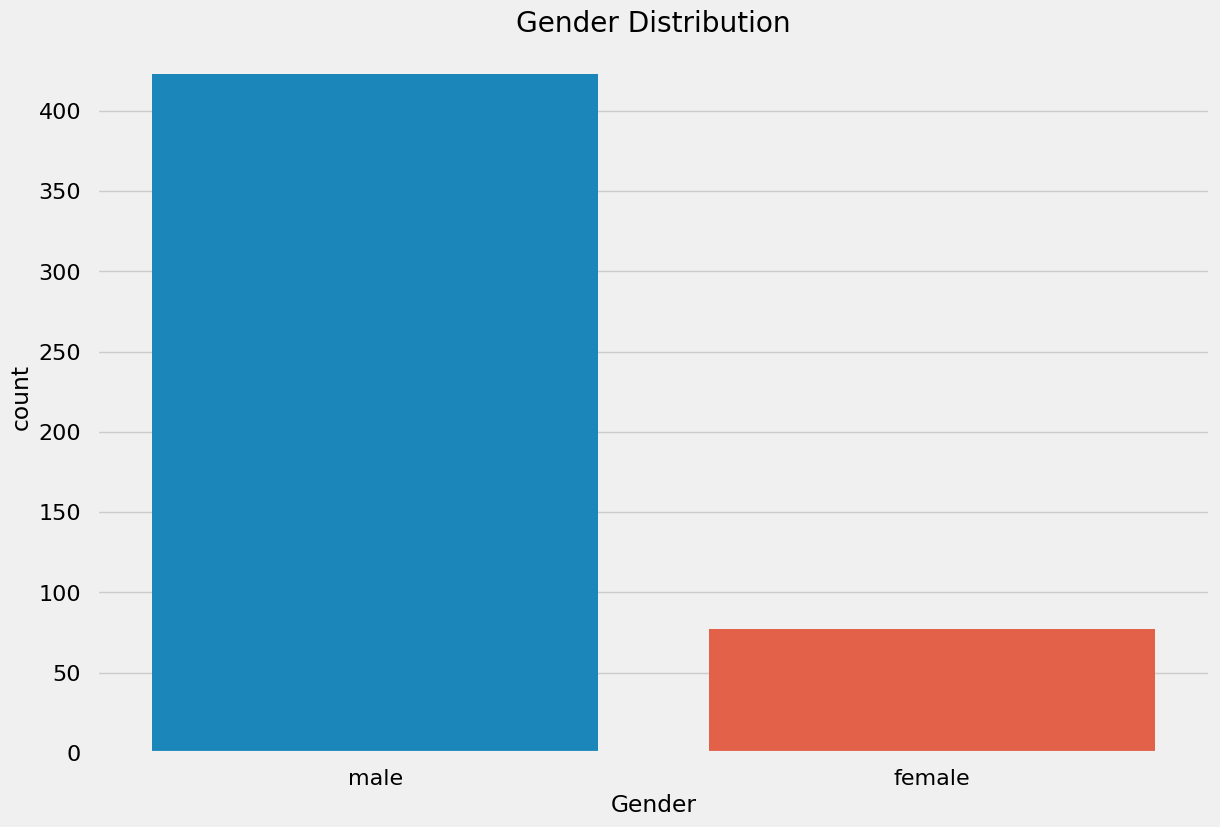

In [ ]:
sns.countplot(x='Gender',data=df)
plt.title("Gender Distribution")

## Inference

---
Out of 500 people

423 male

77 female

## Age

<Axes: xlabel='age', ylabel='count'>

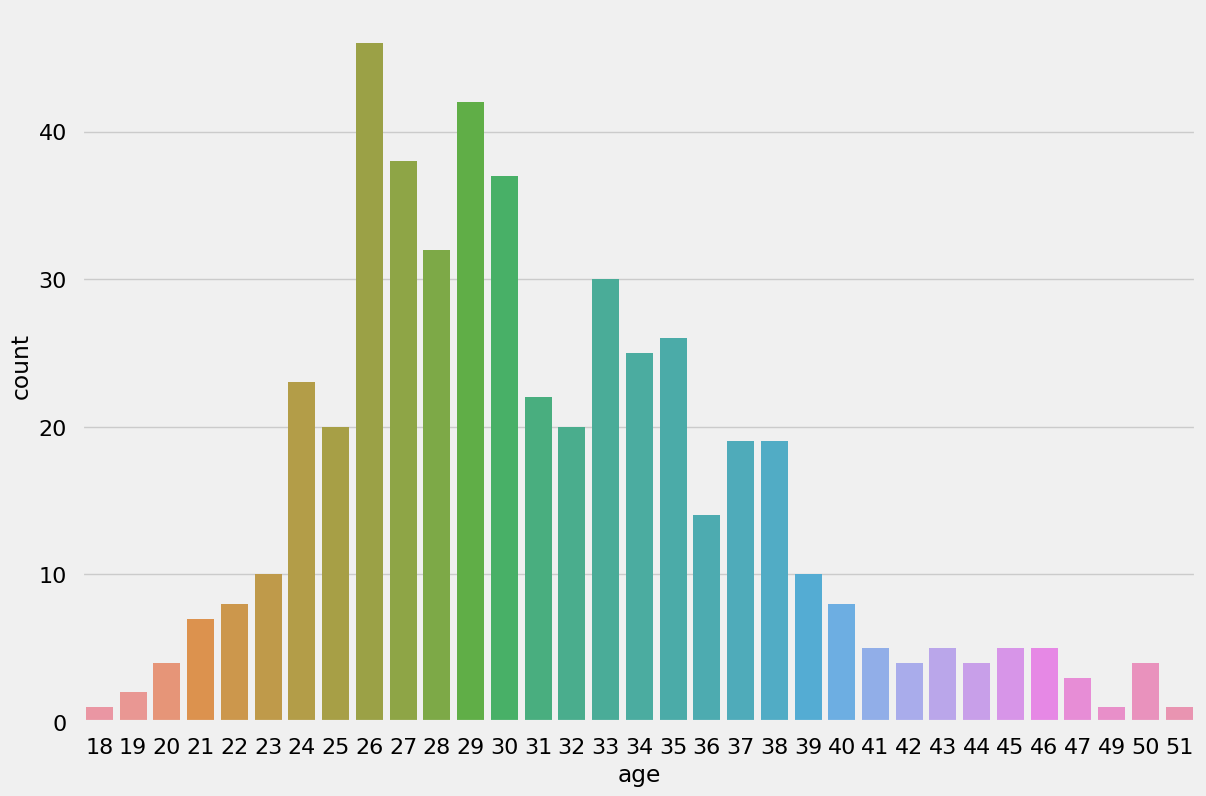

In [ ]:
sns.countplot(x='age',data=df)

Text(0.5, 1.0, 'Age Kde Plot System Analysis')

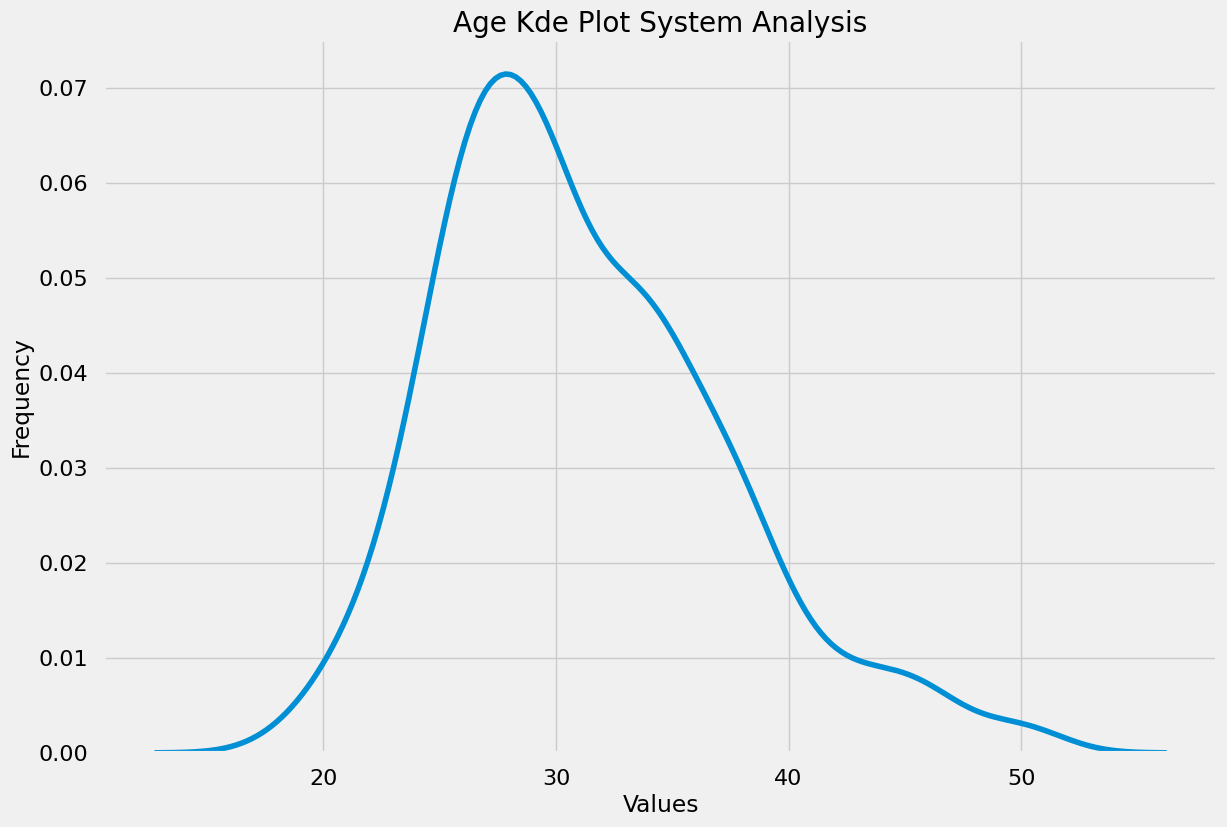

In [ ]:
sns.kdeplot(df['age'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age Kde Plot System Analysis')

## Inference

---
Most of the loan takers are ranging between 25 to


Prinicipal Amount

{'bodies': [<matplotlib.collections.PolyCollection at 0x7d7e579e1720>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7d7e579e16c0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7d7e579e1cf0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7d7e579e2050>}

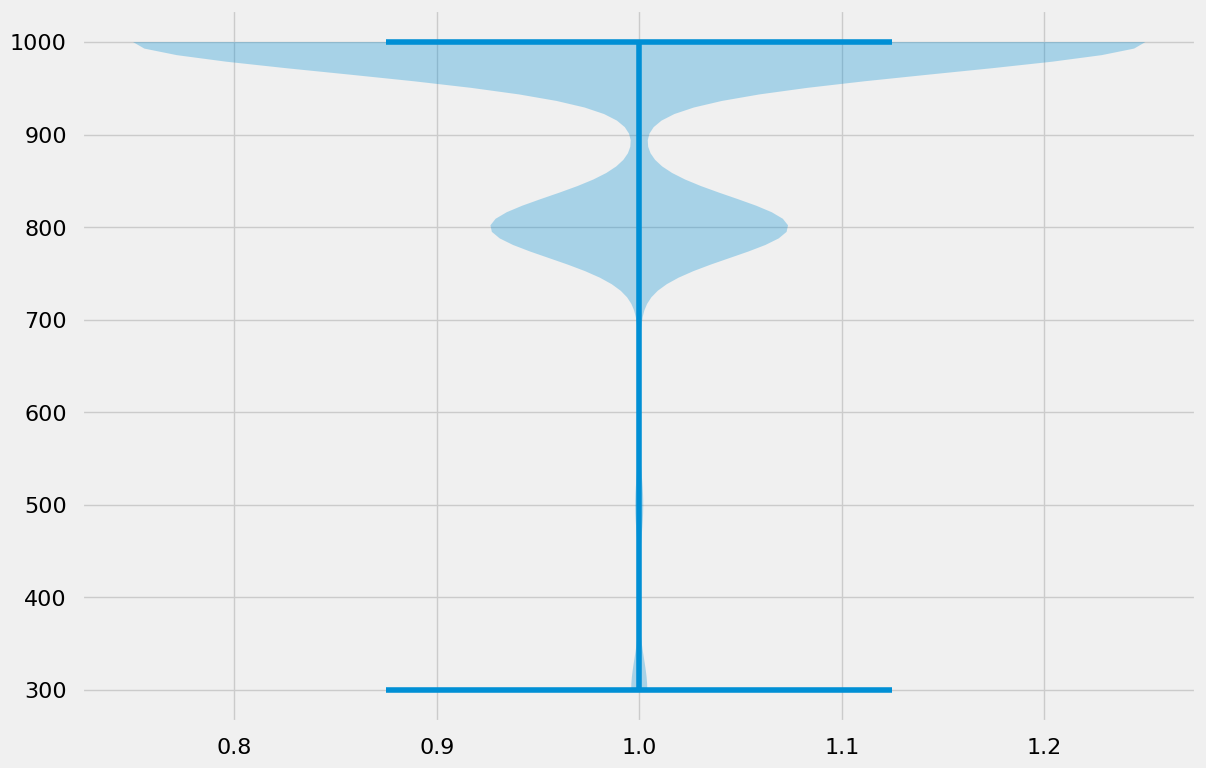

In [ ]:
plt.violinplot(df["Principal"])

## Inference

---
The probability of taking a principal amount of 1000 and 800 is depicted


## Terms

<Axes: ylabel='Frequency'>

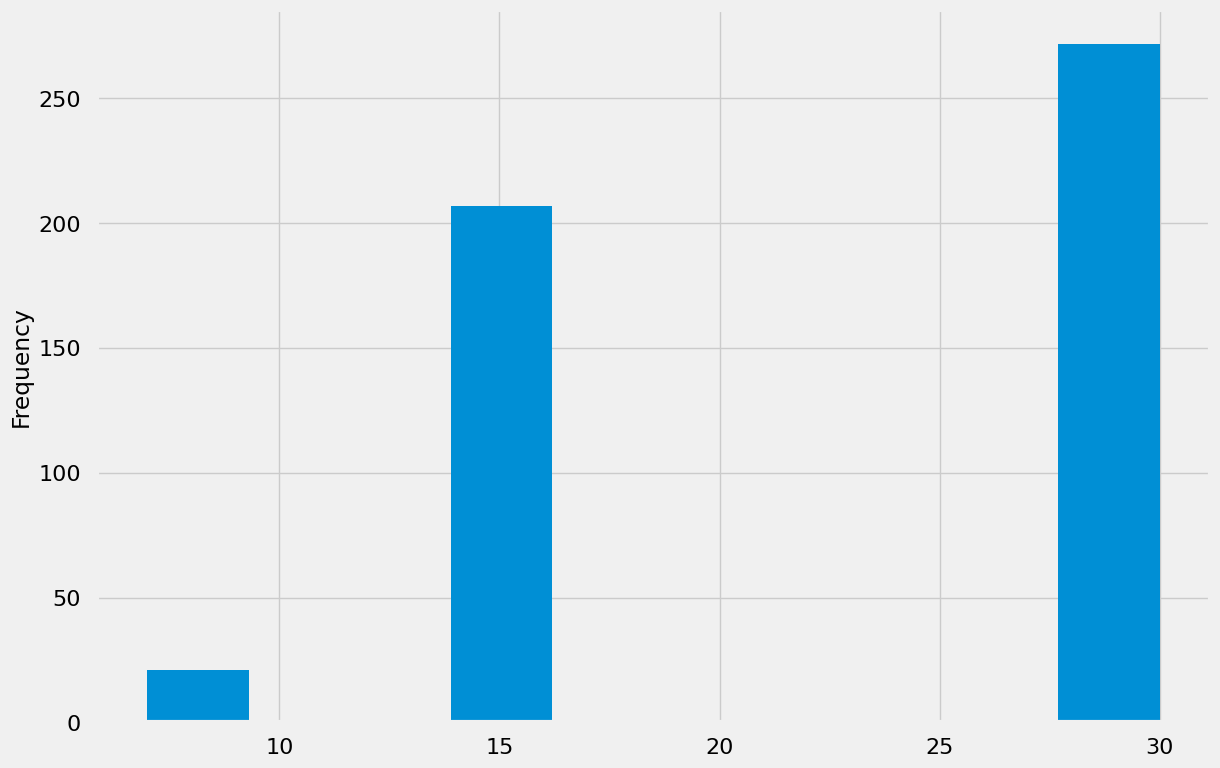

In [ ]:
df['terms'].plot(kind="hist")

## Inference

---
Most of the term of the loan is 30


## Education

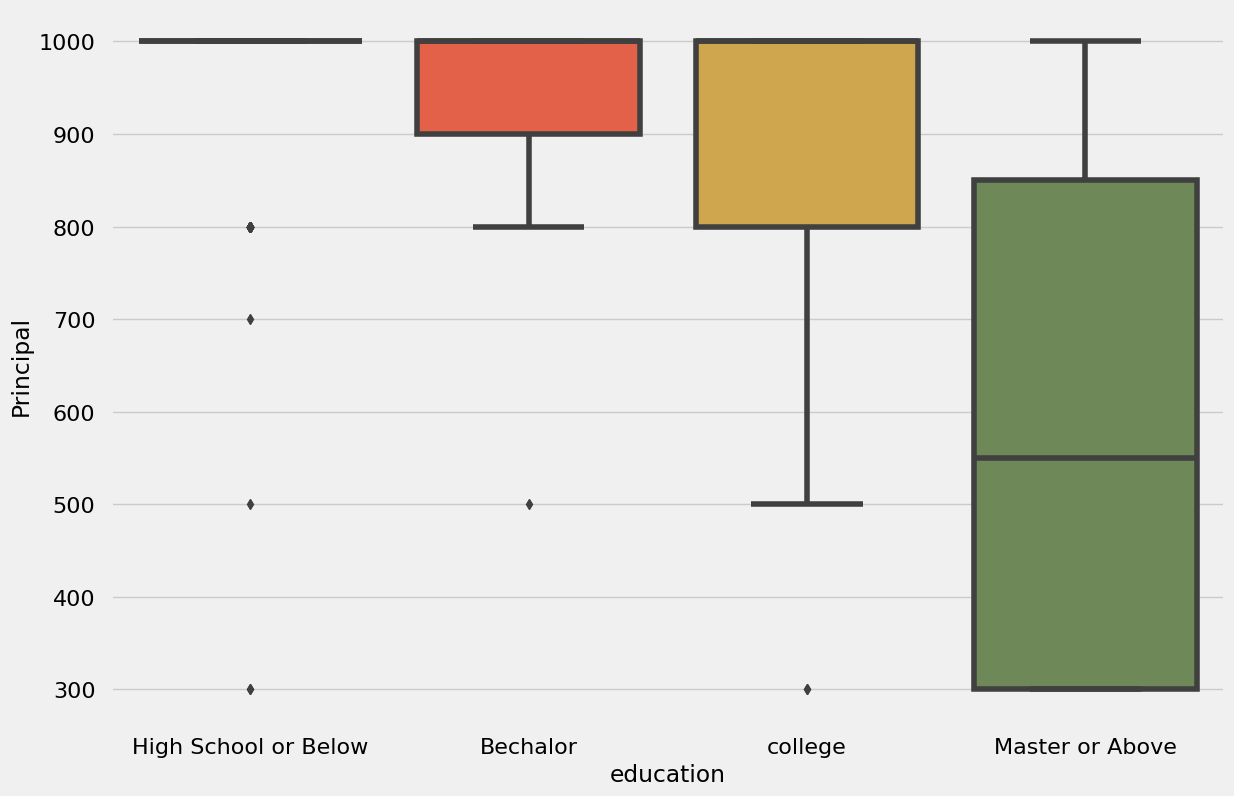

In [ ]:
sns.boxplot(x='education', y='Principal', data=df)
plt.show()

## Inference

---
Applicants going for higher studies apply for Principal Amount 1000 or 800


# Bivariate Analysis

# Age vs Past Due Days

In [ ]:
px.scatter(df, x="age", y="past_due_days", size ="terms" ,color="loan_status", log_x=True, size_max=8)

## Inference

---
Most of the Elder people (35 - 50 years) have paid back loan on time

# Age vs Loan Status

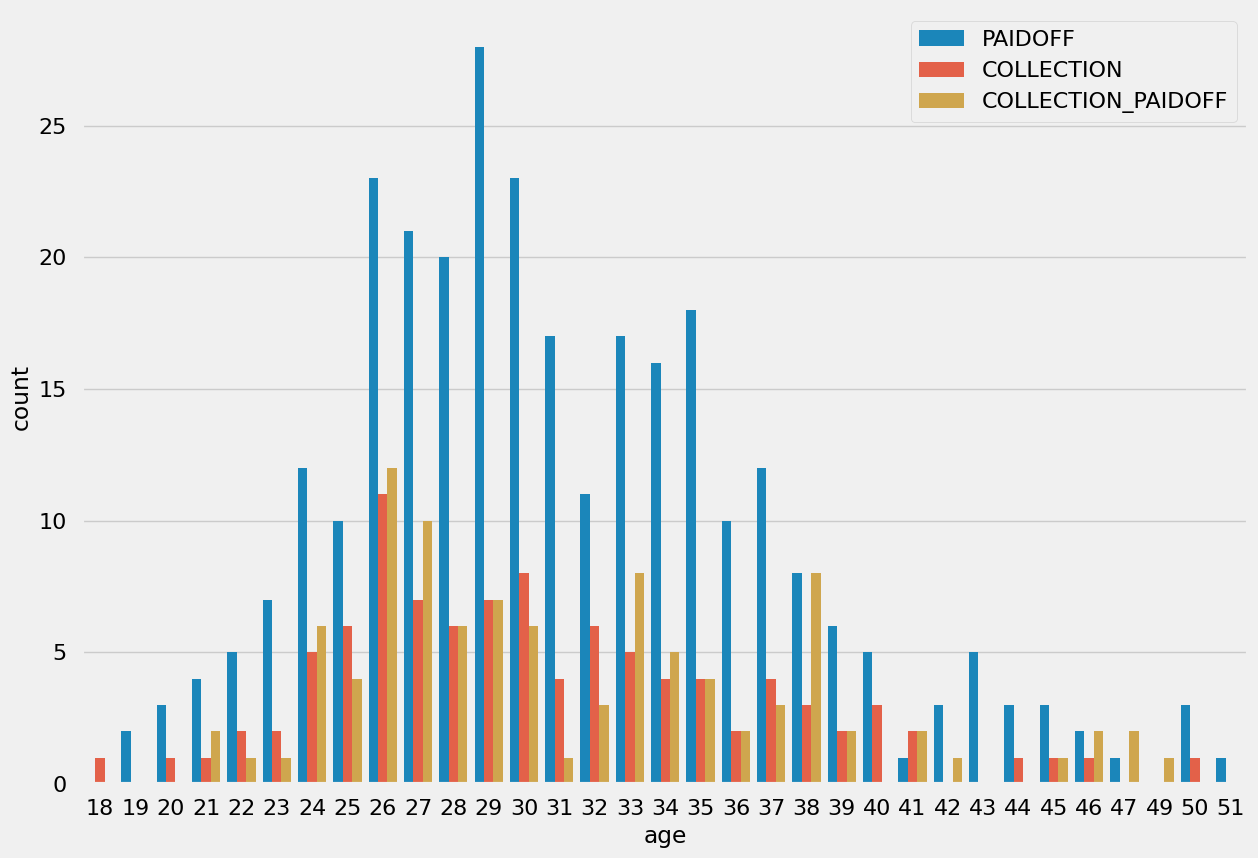

In [ ]:
sns.countplot(x=df['age'],hue=df['loan_status'])
plt.legend(loc=1)
plt.tight_layout()
plt.show()

## Inference

---
Majority of the people who took loan have age ranging from 24 years to 38 years

Majority of people repaid their loan

# Age vs Terms

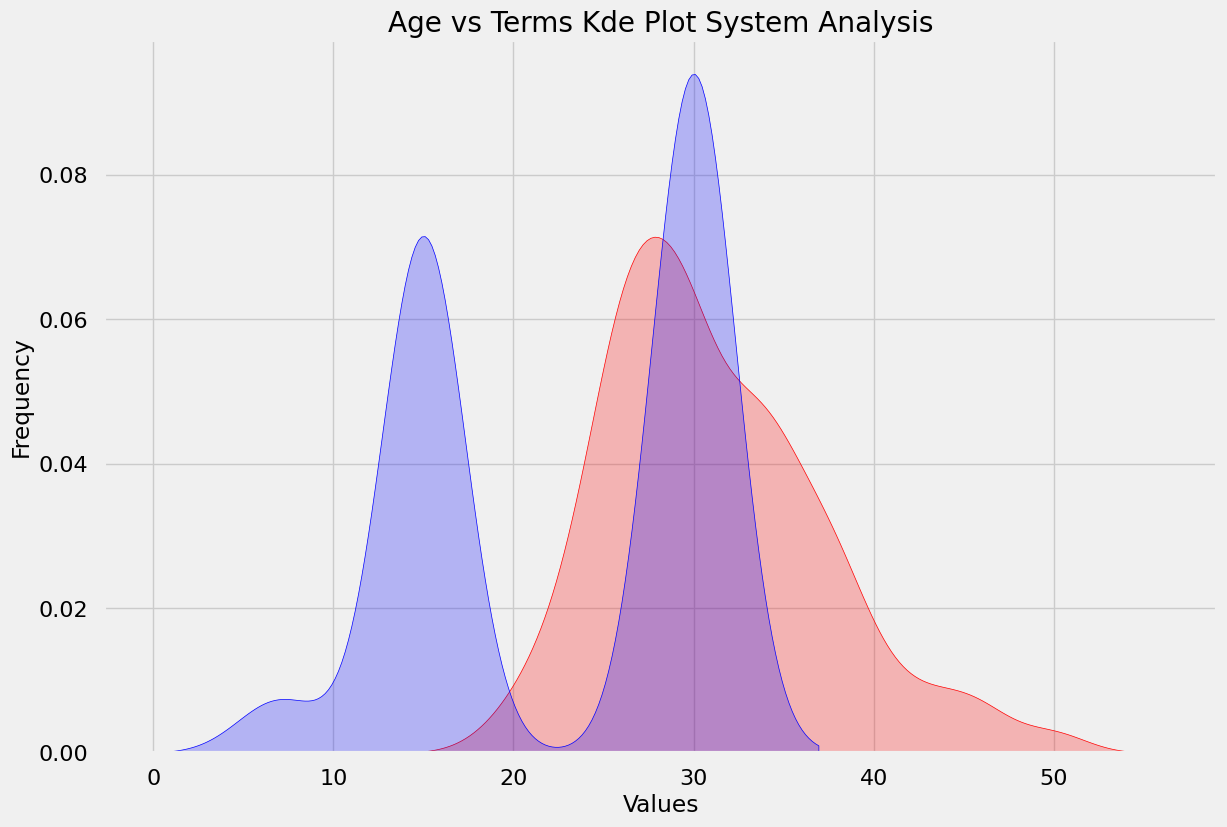

In [ ]:
sns.kdeplot(df['age'],fill=True,color='r')
sns.kdeplot(df['terms'],fill=True,color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age vs Terms Kde Plot System Analysis')
plt.show()


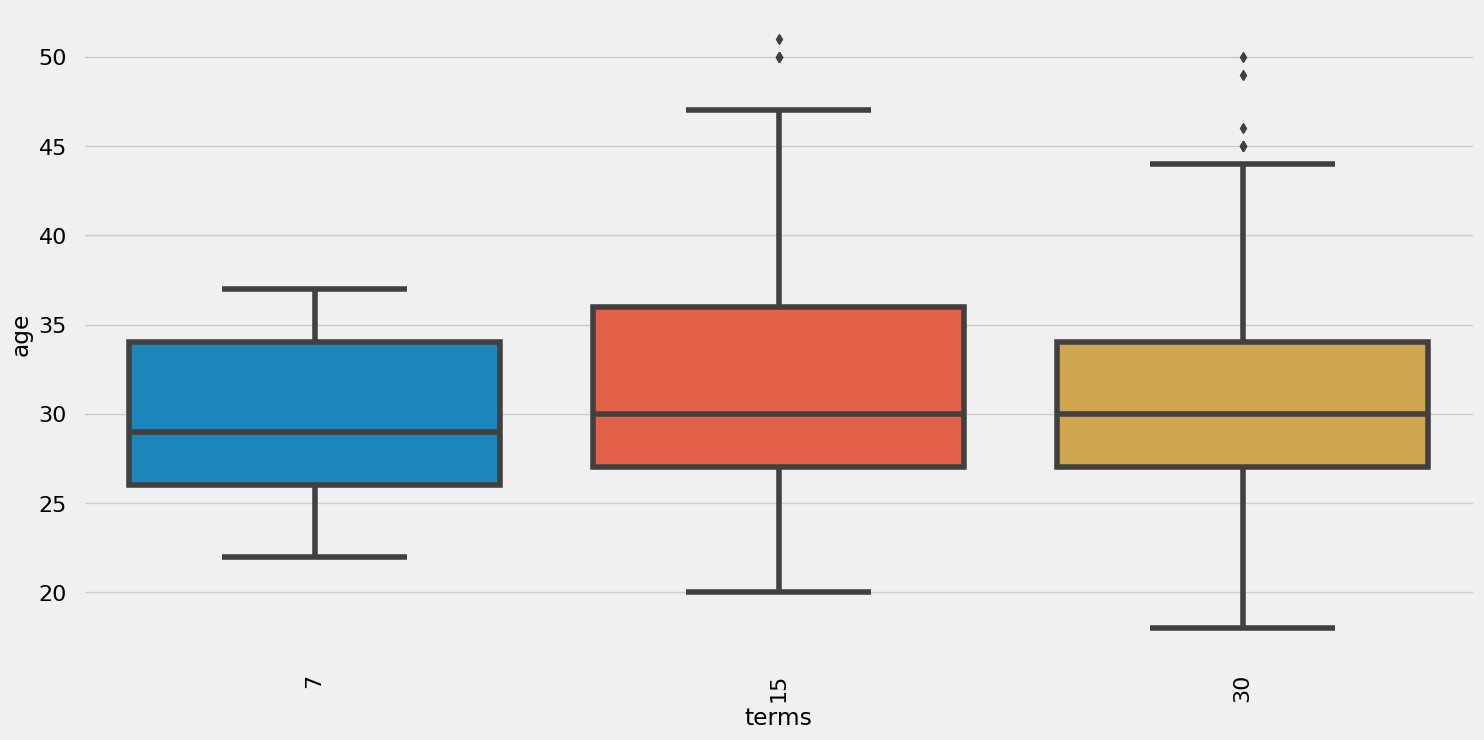

In [ ]:
data = pd.concat([df['age'], df['terms']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='terms', y="age", data=data)
plt.xticks(rotation=90);

## Inference

---
Applicants around the age of 30s have taken the term of 30 months

# Effective Data vs Loan Status

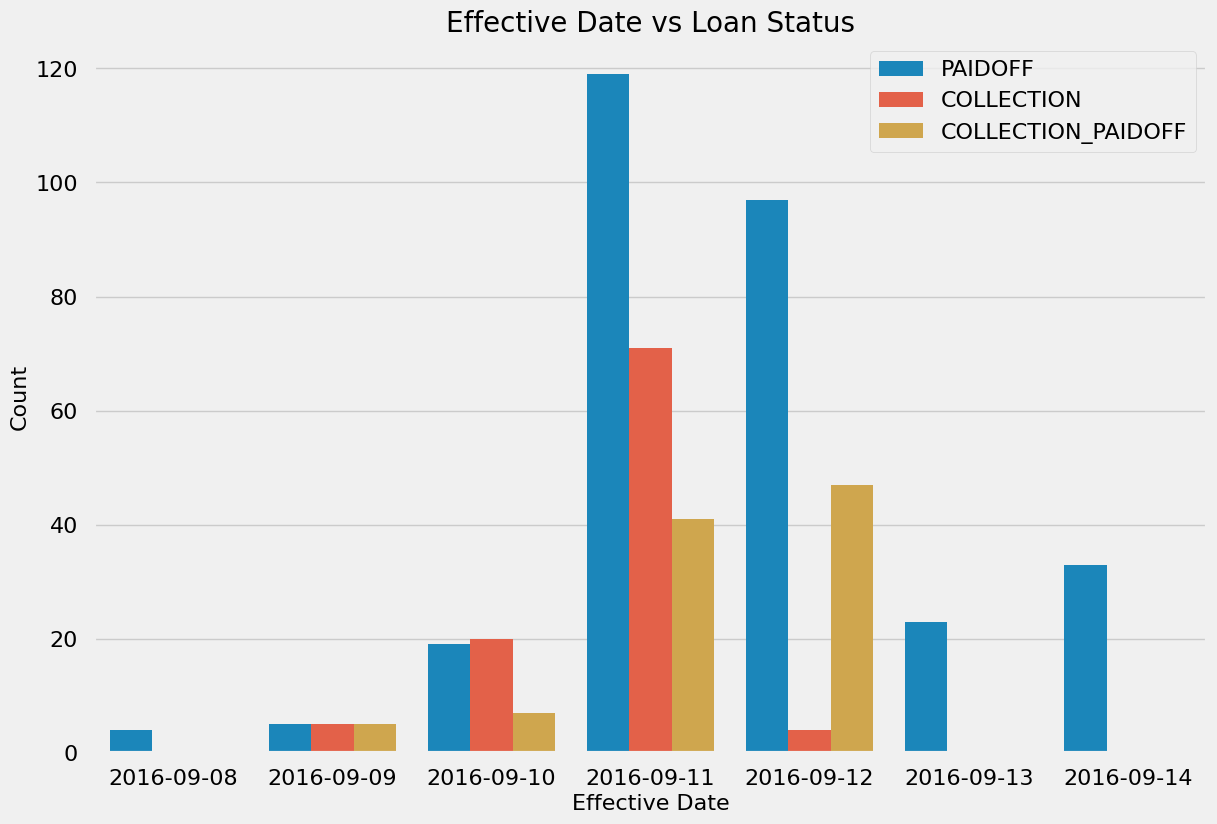

In [ ]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
dates = df['effective_date'].dt.date
sns.countplot(x=dates, hue=df['loan_status'])
plt.legend(loc='upper right')
plt.title('Effective Date vs Loan Status',fontsize=20)
plt.xlabel('Effective Date', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

## Inference

---
On 11th and 12th September, loan was given to many people

# Multivariate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



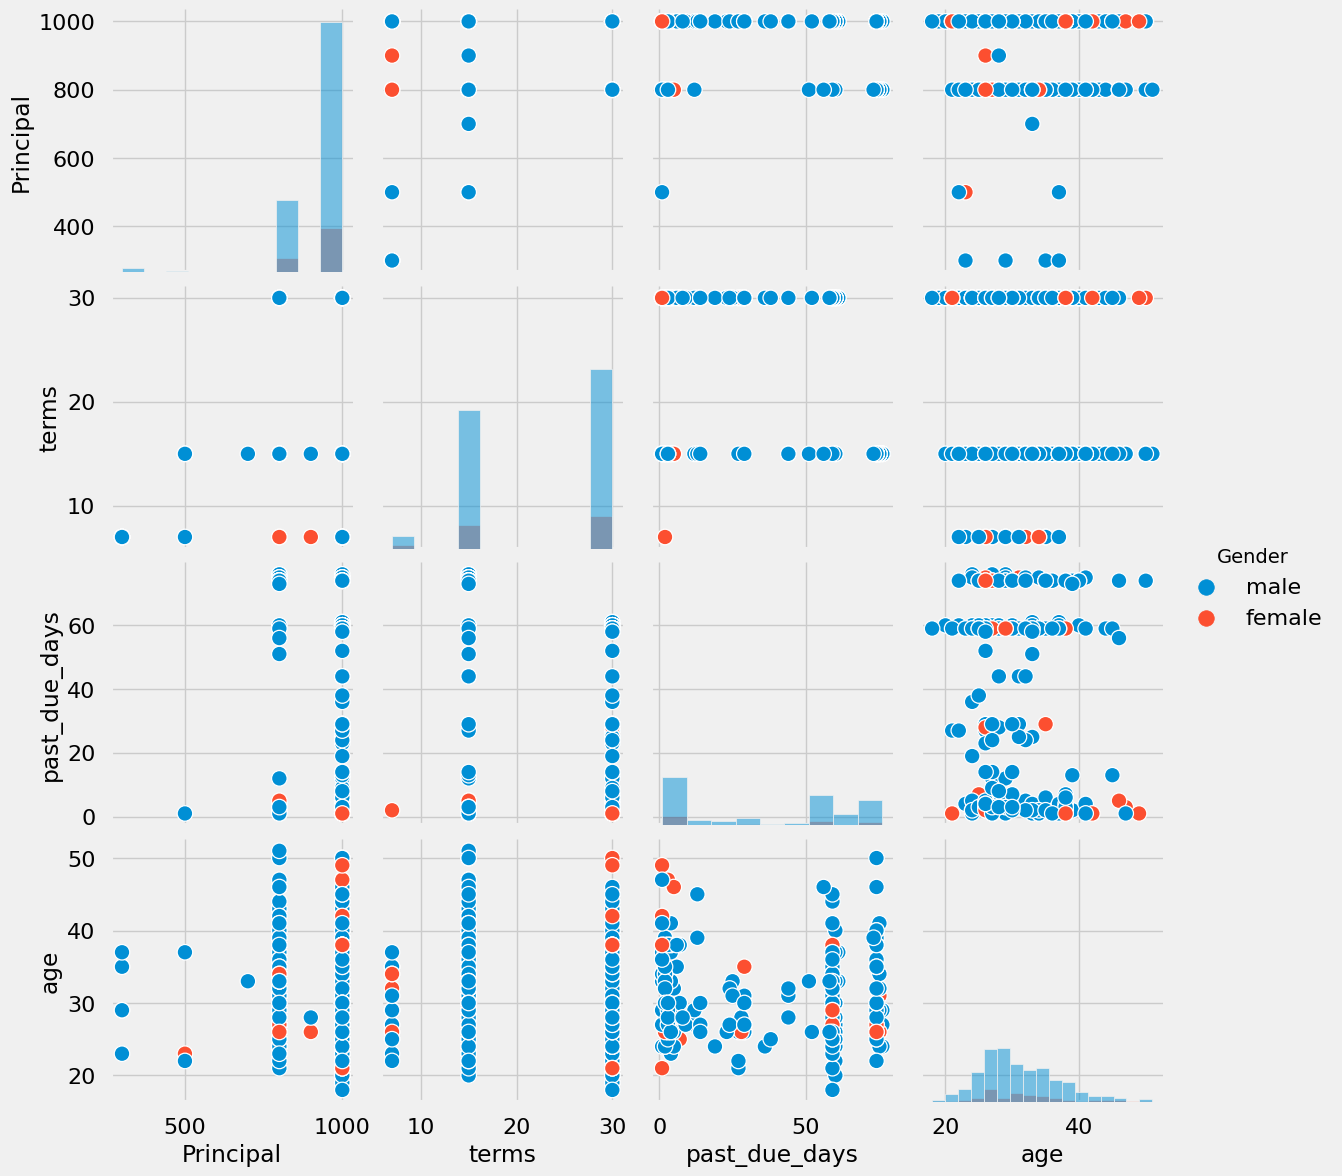

In [ ]:
#multivariate inputs
s=sns.pairplot(df,hue='Gender',size=3,diag_kind='hist')
s.savefig("output.png")

## Inference

---
Male candidates applied for Principal 400 - 500 range

Female candidates apply for Principal amount starting with 800 and apply for most of application having principal amount = 1000

<ipython-input-87-44a45f63506d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 0, 'Principal'),
 Text(1.5, 0, 'terms'),
 Text(2.5, 0, 'past_due_days'),
 Text(3.5, 0, 'age')]

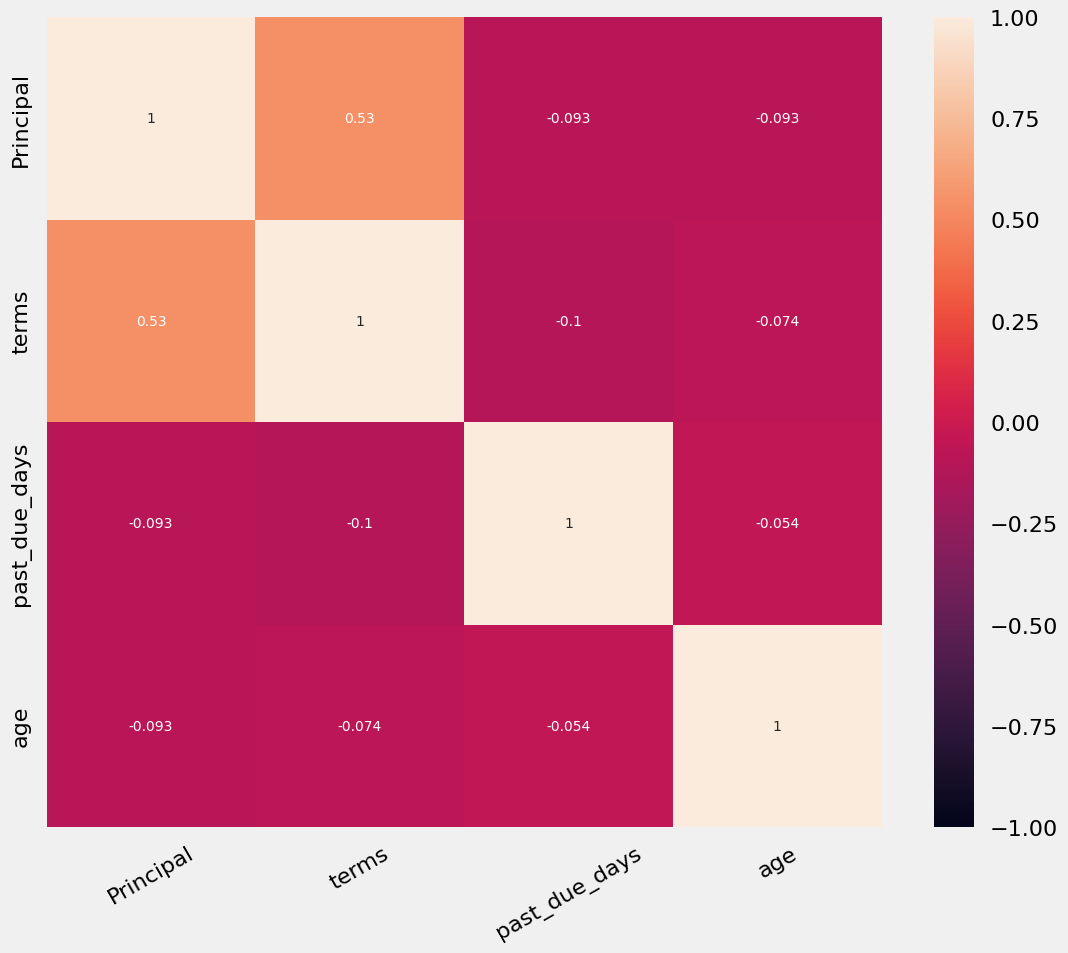

In [ ]:
correlation = df[df.columns].corr()
plt.figure(figsize=(12, 10))
plot = sns.heatmap(correlation, vmin = -1, vmax = 1,annot=True, annot_kws={"size": 10})
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)

## Inference

---
People going for higher studies apply for loan with Principal Amount of 800 , 1000

Male candidates apply wide variety of loans

On 11th September shows very high sales with higher defaulters